# **statmodels for regression analysis**

Notebook Contents:
1. What is a regression model?
2. What are the steps in regression analysis?
3. How can we perform regression analysis in Python?
4. BONUS: What are some other options for regression analysis in Python?
5. Next steps

# **1.What is a regression model?**
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'target', 'outcome' or 'response' variable, or a 'label' in machine learning) and one or more independent variables (often called 'inputs', 'predictors', 'covariates', 'explanatory variables' or 'features').

We will focus on implementation of regression analysis using Python. Please check out this [regression analysis book](https://sadbhavnapublications.org/research-enrichment-material/2-Statistical-Books/Regression-Analysis-by-Example.pdf) for a refresher on regression concepts.

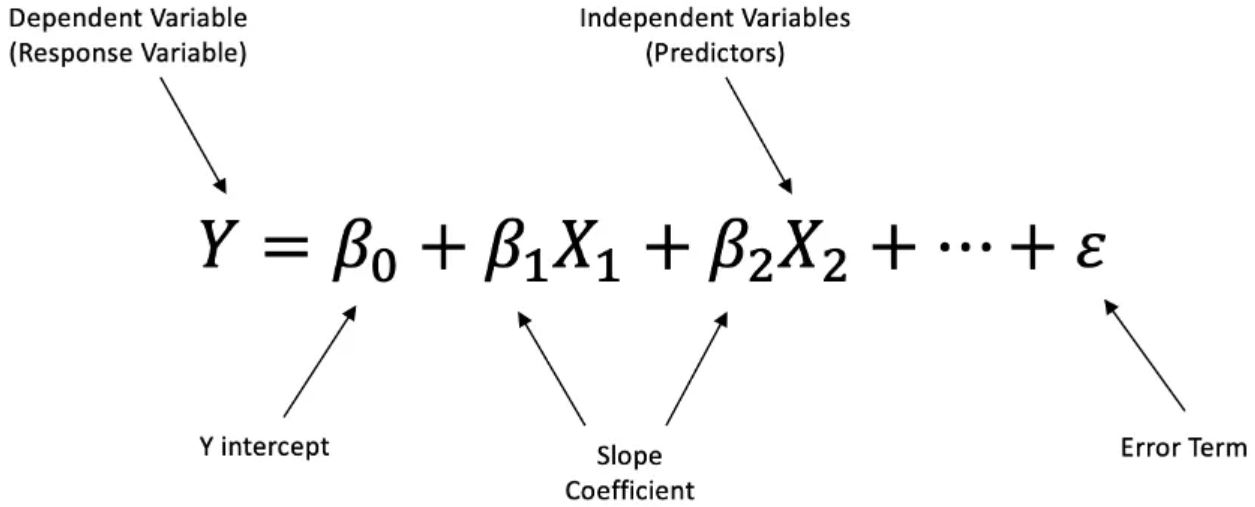

**Regression analysis purposes**

*   Prediction and forecasting
*   Inferring causal relationships between the independent and dependent variables

# **2.What are the steps in regression analysis?**

Regression analysis can be performed with numerous tools (Excel, Minitab, SPSS, MATLAB, R, Python, etc.). A typical regression analysis, regardless of the tool, contains the following steps.



1.   **Define the Problem:** Define the problem and identify the variables that
will be used in the analysis.
2.   **Collect the Data:** Collect data on the variables of interest.
3.   **Check the Modelling Assumptions:** Identify the modeling assumptions and make sure to satisfy them.
4.  **Run the Regression Analysis:** Once the assumptions have been met, run the regression analysis and examine the results.
5.  **Interpret the Results:** Interpret the results and determine the significance of the independent variables.
6.  **Make Predictions:** Use the results to make predictions about the dependent variable.






# **3.How can we perform regression analysis in Python?**
Today, we will use a benchamark dataset so we can assume that the first steps are already completed for us. We will be using Python's statmodels package for obtaining regression models.

statmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

Today we will use statsmodels.api for working with regression models. Feel to explore everything statmodels has to offer by checking out this [documentation](https://www.statsmodels.org/stable/index.html)

We will follow the following steps.
1.   **Importing the Python package:** Import the statmodels package for performing regression analysis in Python.
2.   **Loading the dataset:** Download the penguin dataset from Github.
3.   **Fitting the model:** Use stamodel classes for obtaining regression models.
4.  **Evaluating the model:** Check model accuracy.

**Step 1:** Importing the Python package

In [ ]:
import pandas as pd
import seaborn as sn
import statsmodels.api as sm

**Step 2:** Loading the dataset

We will download the dataset from the Github link and save it as a pandas dataframe.

In [ ]:
url= "https://raw.githubusercontent.com/bencearato/data/master/penguins_cleaned.csv"
df = pd.read_csv(url,index_col=False)

The penguin dataset contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset contains 7 variables.
*   species a factor denoting penguin species (Adélie, Chinstrap and Gentoo)
*   island a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
*   bill_length_mm a number denoting bill length (millimeters)
*   bill_depth_mm a number denoting bill depth (millimeters)
*   flipper_length_mm an integer denoting flipper length (millimeters)
*   body_mass_g an integer denoting body mass (grams)
*   sex a factor denoting penguin sex (female, male)

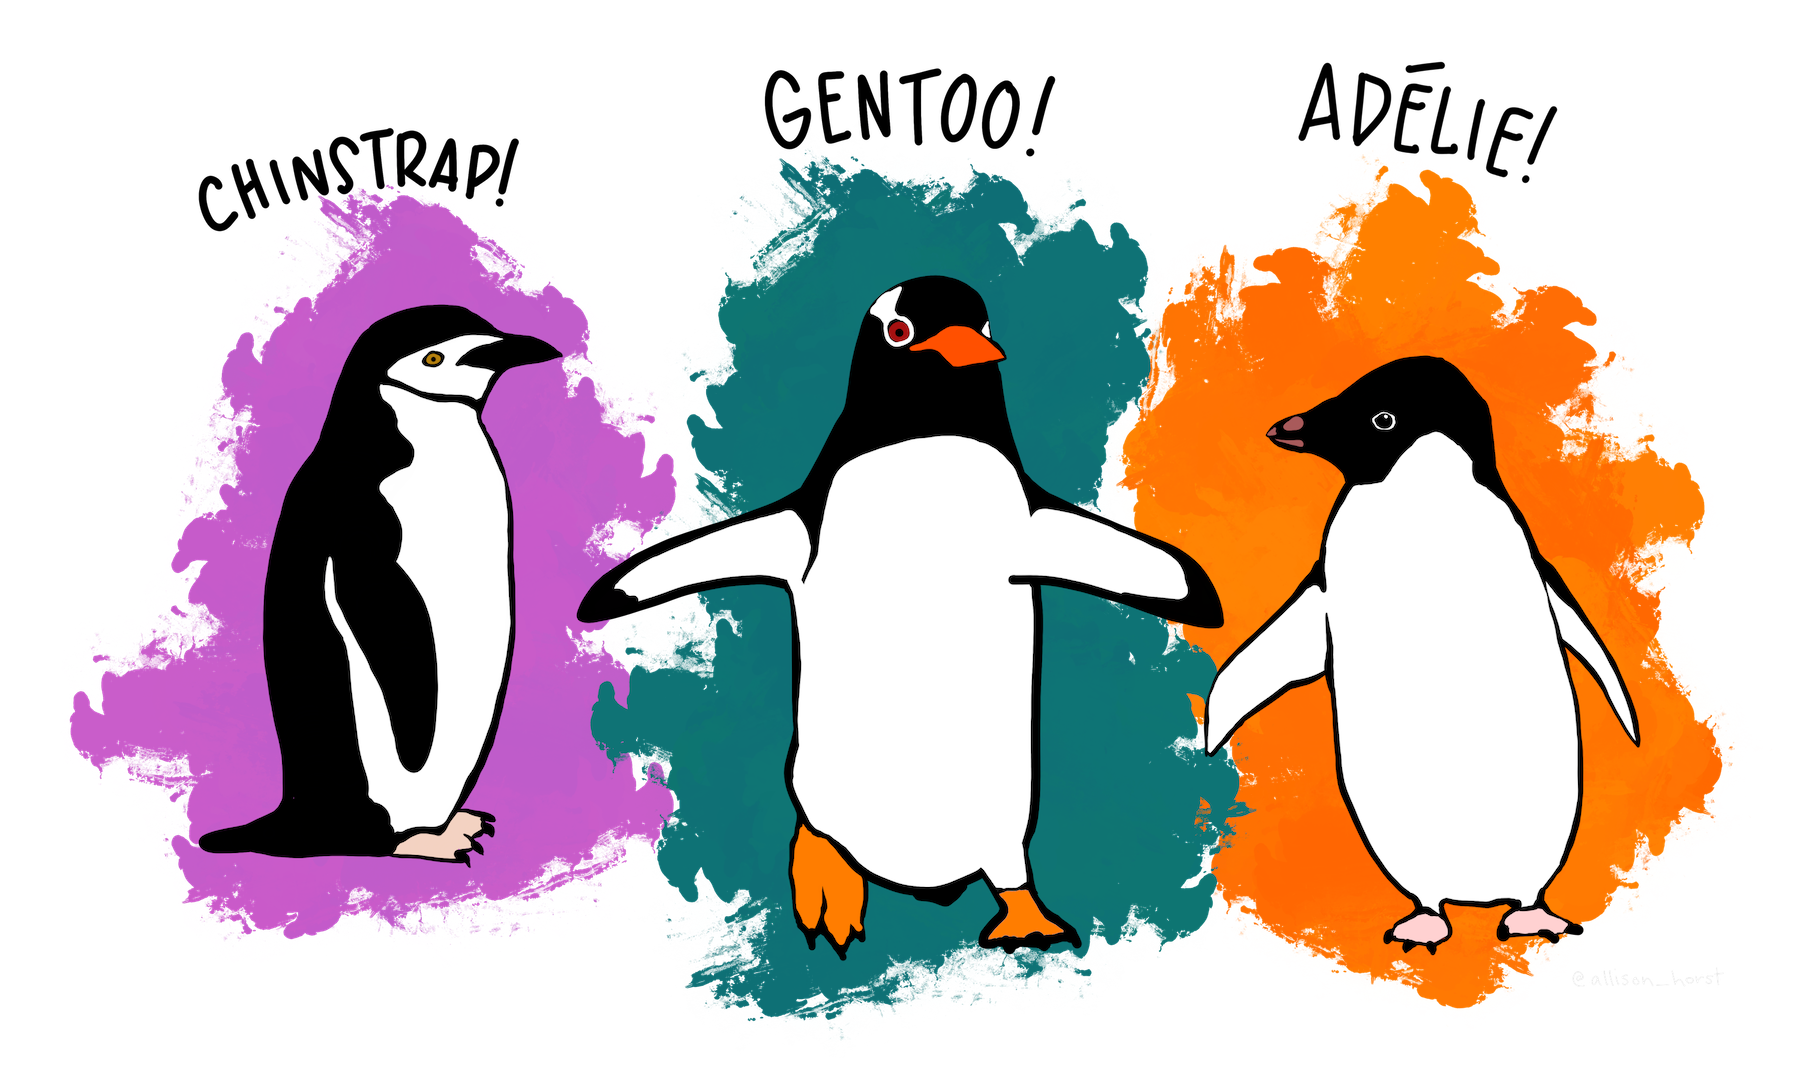


Now we can take a closer look at the dataset and make an exploratory data analysis to understand it better.

**Summary of the numerical variables**

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


**Summary of the categorical variables**

In [ ]:
df.describe(include=[object])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


**Assessment of the relationships between variables**


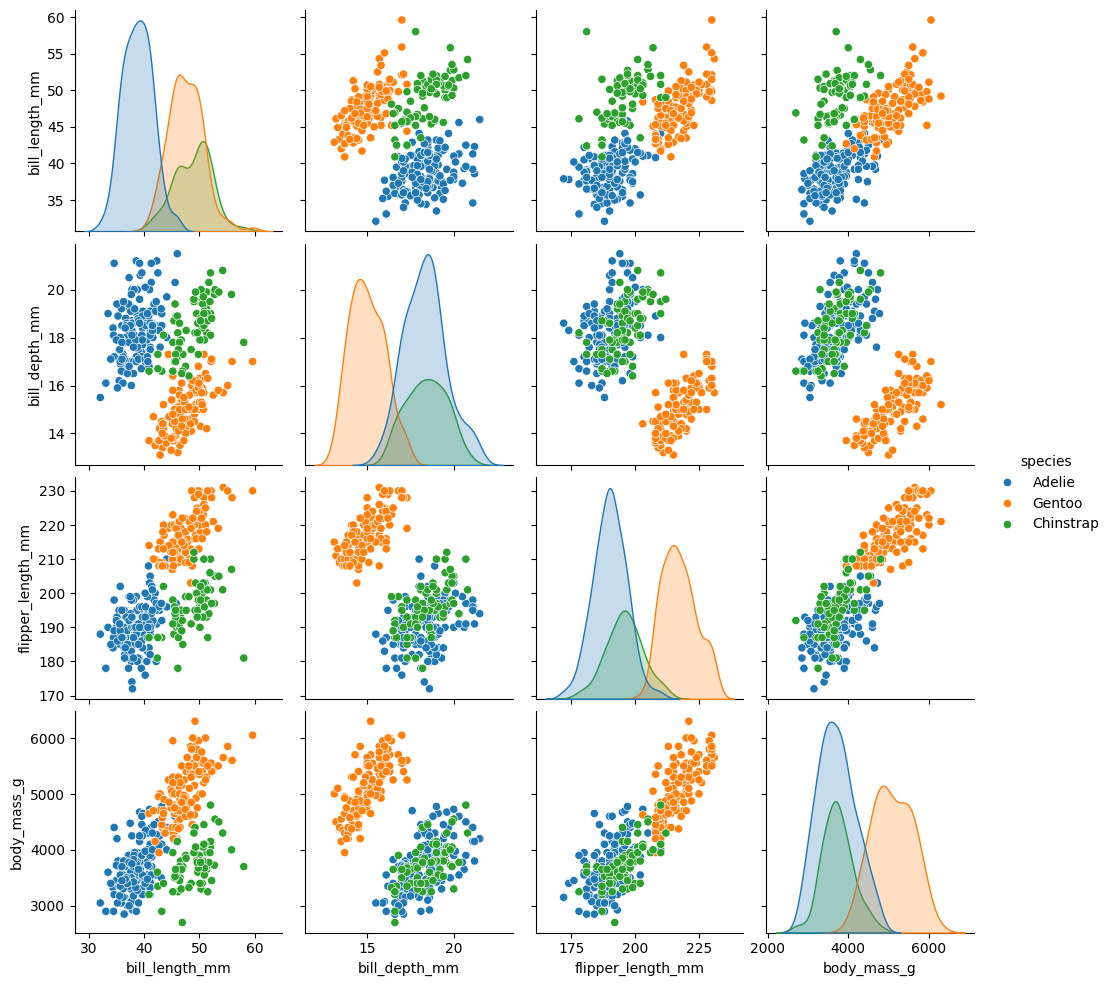

In [ ]:
sn.pairplot(df, hue="species")

We can build the following models between variables considering the relationships we have identified.

**Exercise 1**

x = flipper_length_mm

y = body_mass_g

**Exercise 2**

x = flipper_length_mm

y = bill_length_mm

**Exercise 3**

x = flipper_length_mm, bill_length_mm

y = body_mass_g

**Exercise 4**

x = flipper_length_mm, bill_length_mm, bill_depth_mm

y = species


## **Example 1: ordinary least squares regression with 1 continuous input and 1 continuous output**



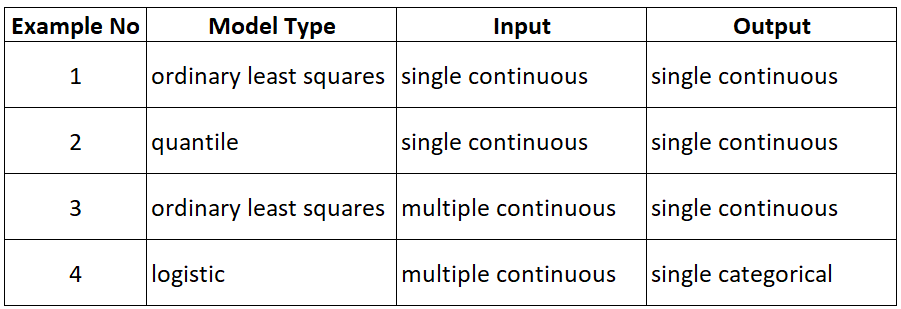


**Step 1:** Importing the Python package

We have already done this.

**Step 2:** Loading the dataset

We have already done this. Let's define the model inputs and outputs.

Given the bill length, our first model will predict a penguin's body mass. So, the independent variable, x, is 'bill_length_mm' and the dependent variable, y, is 'body_mass_g' from our pandas dataframe.

*   x = 'bill_length_mm'
*   y = 'body_mass_g'

In [ ]:
x = df['bill_length_mm']
x = sm.add_constant(x) #adding an intercept term to the model
y = df['body_mass_g']

 **Step 3:** Fitting the model

We will fit an ordinary least squares (OLS) model. OLS is the most commonly used procedure for linear regression and it works by minimizing the sum of squared residuals (errors) to find the regression coefficients. You can use OLS when working with continuous input and continuous output variables. Please check out Chapter 2 in this [regression analysis book](https://sadbhavnapublications.org/research-enrichment-material/2-Statistical-Books/Regression-Analysis-by-Example.pdf) for more on OLS.

In [ ]:
model_ols = sm.OLS(y, x)
result_ols = model_ols.fit()

**Step 4:** Evaluating the model

In [ ]:
print_result_ols = result_ols.summary()
print(print_result_ols)

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.54e-32
Time:                        00:52:06   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            388.8452    289.817      1.

In [ ]:
parameters = result_ols.params #save the model coefficients in a variable
r2 = result_ols.rsquared #save the model's R2 in a variable

print("Parameters: ", parameters)
print("R2: ", r2)

Parameters:  const             388.845159
bill_length_mm     86.791760
dtype: float64
R2:  0.34745261128883753


In statistics, a residual is the difference between a variable's observed value and the variable's predicted value.

In a residual analysis, residuals are used to assess the validity of a statistical or ML model. The model is considered a good fit if the residuals are randomly distributed. If there are patterns in the residuals, then the model is not accurately capturing the relationship between the variables. It may need to be improved, or another model may need to be selected.

The most useful way to plot the residuals, though, is with the predicted values on the x-axis and residuals on the y-axis.

In [ ]:
residuals = result_ols.resid
fitted = result_ols.fittedvalues

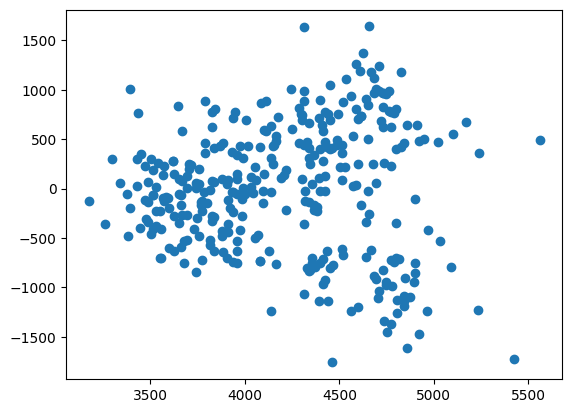

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = fitted, y = residuals)

Regression analysis assumes that residuals follow a normal distribution. A Q-Q plot can be used to assess whether the residuals follow a normal distribution or not.

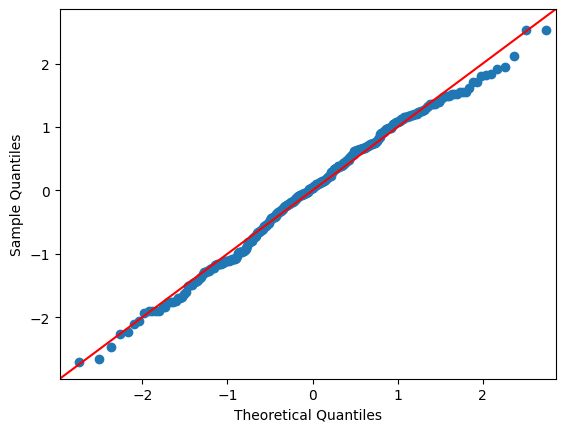

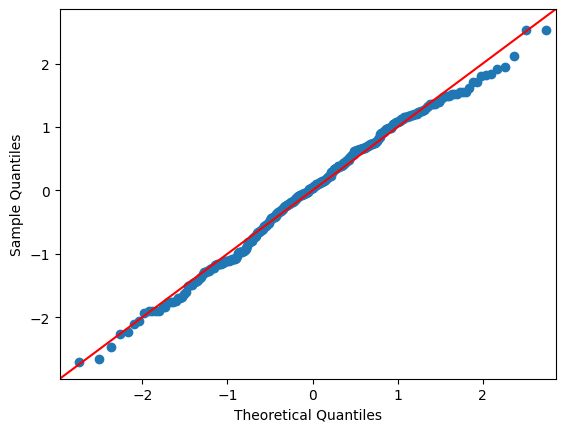

In [ ]:
sm.qqplot(residuals, fit=True, line="45")

In [ ]:
predictions_ols = result_ols.predict([1, 40])
print(predictions_ols)

[3860.51554466]


Alternatively, R-style formulas can be used for fitting a model too.

**Alternative Step 3:** Fitting the model with R-style formulas

In [ ]:
model_formula = sm.formula.ols(formula="body_mass_g ~ bill_length_mm", data=df)
result_formula = model_formula.fit()

In [ ]:
print(result_formula.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.54e-32
Time:                        00:58:51   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.

## **Exercise 1**

**a)** Build an ordinary least squares regression model where 'flipper_length_mm' is the input variable and 'body_mass_g' is the output variable.

**b)** Report the R2 of the obtained model.

**c)** Use the model for predicting the body masses of penguins with 179 and 216 mm flipper lengths.

In [ ]:
x = df['flipper_length_mm']
x = sm.add_constant(x)
y = df['body_mass_g']

In [ ]:
model = sm.OLS(y, x)
results = model.fit()

In [ ]:
print_results = results.summary()
print(print_results)

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          3.13e-105
Time:                        01:05:29   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

In [ ]:
print(results.rsquared)

0.7620921573403912


In [ ]:
prediction = results.predict([[1, 179], [1, 216]])
print(prediction)

[3105.34192082 4961.01276068]


## **Example 2: quantile regression with 1 continuous input and 1 continuous output**

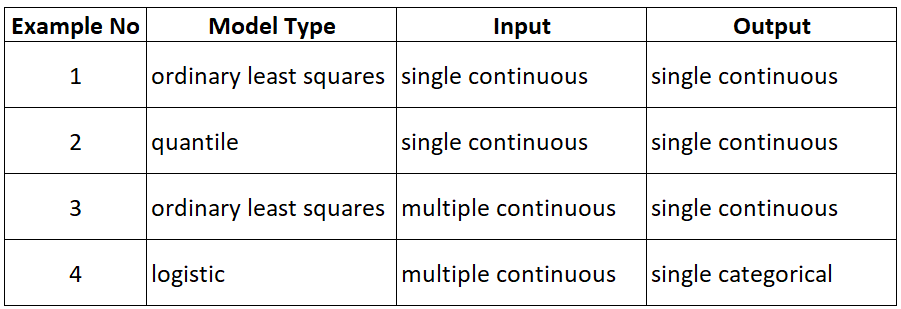

Given the flipper length, our second model will predict a penguin's body mass. So, the independent variable, x, is 'flipper_length_mm' and the dependent variable, y, is 'body_mass_g' from our pandas dataframe.

*   x = 'flipper_length_mm'
*   y = 'body_mass_g'

In [ ]:
x = df['flipper_length_mm']
x = sm.add_constant(x) #adding an intercept term to the regression model
y = df['body_mass_g']

This time let's explore a different regression approach and fit a quantile regression model. While OLS predicts conditional the mean of the output variable across values of the input variables; quantile regression predicts the conditional median (quantiles) of the putput variable.

**Advantes of quantile regression over OLS**

*   Estimates are more robust agains outliers in the output variable
*   Median predictions allow more comprehensive analysis

You can use quantile regression when working with continuous input and continuous output variables.

When fittin our quantile regression model using statmodels, we will need to identify which median (quantile) we would like to predict. For example, to predict 25th quantile, the value at which 25% of the output variables lie below that value and 75% of the answers lie above that value, we will need to input *q=0.25* as a model parameter.

In [ ]:
model_qr = sm.QuantReg(y, x)
result_rq = model_qr.fit(q=0.5) #we want to predict the 50% percentile, so q=0.5
print(result_qr.summary())

                         QuantReg Regression Results                          
Dep. Variable:            body_mass_g   Pseudo R-squared:               0.5350
Model:                       QuantReg   Bandwidth:                       273.7
Method:                 Least Squares   Sparsity:                        1022.
Date:                Wed, 24 Apr 2024   No. Observations:                  333
Time:                        01:09:56   Df Residuals:                      331
                                        Df Model:                            1
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5985.3659    403.019    -14.851      0.000   -6778.168   -5192.564
flipper_length_mm    50.6098      2.001     25.298      0.000      46.674      54.545

The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or

In [ ]:
print("Parameters: ", result_qr.params)
print("R2: ", result_qr.prsquared)

Parameters:  const               -5985.365856
flipper_length_mm      50.609756
dtype: float64
R2:  0.5349706616435498


In [ ]:
predictions_qr = result_qr.predict([1, 220])
print(predictions_qr)

[5148.78048744]


Alternative model fitting with R-style formula.



In [ ]:
model_formula = sm.formula.quantreg(formula="body_mass_g ~ flipper_length_mm", data=df)
result_formula = model_formula.fit(0.5)

# **Exercise 2**

**a)** Build a quantile regression model for 25% where 'flipper_length_mm' is the input variable and 'bill_length_mm' is the output variable.

**b)** Report the R2 of the obtained model.

**c)** Use the model for predicting the bill length of a penguin with 183 mm flipper length.

In [ ]:
x = df['flipper_length_mm']
x = sm.add_constant(x)
y = df["bill_length_mm"]

In [ ]:
model = sm.QuantReg(y, x)
result = model.fit(q=0.25)

In [ ]:
print(result.summary())

                         QuantReg Regression Results                          
Dep. Variable:         bill_length_mm   Pseudo R-squared:               0.3548
Model:                       QuantReg   Bandwidth:                       2.305
Method:                 Least Squares   Sparsity:                        9.751
Date:                Wed, 24 Apr 2024   No. Observations:                  333
Time:                        01:15:31   Df Residuals:                      331
                                        Df Model:                            1
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -18.4367      3.199     -5.763      0.000     -24.730     -12.143
flipper_length_mm     0.2967      0.016     18.680      0.000       0.265       0.328

The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or

In [ ]:
print("R2: ", result.prsquared)

R2:  0.35482057143512524


In [ ]:
predictions = result.predict([1, 183])
print(predictions)

[35.85333337]


## **Example 3: ordinary least squares regression with multiple continuous inputs and one continuous output**

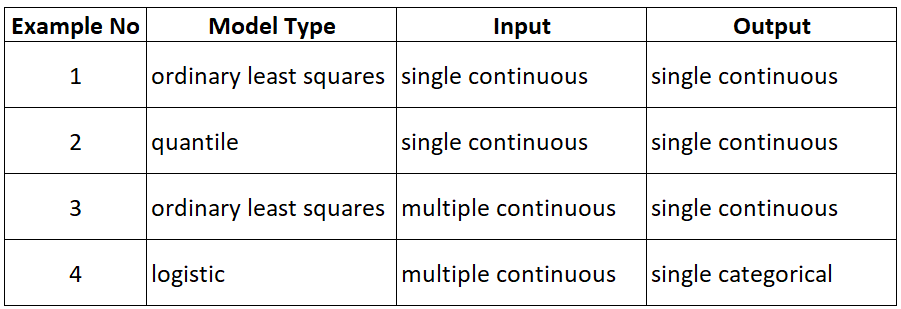

Given the flipper length and bill length, our third model will predict a penguin's bill depth. This time we are working with multiple idependent variables. So, the independent variables, x, are 'flipper_length_mm', 'bill_length_mm' and the dependent variable, y, is 'bill_depth_mm' from our pandas dataframe.

*   x = 'flipper_length_mm', 'bill_length_mm'
*   y = 'bill_depth_mm'

In [ ]:
x = df[['flipper_length_mm', 'bill_length_mm']]
x = sm.add_constant(x)
y = df['bill_depth_mm']

Let's build an OLS model, the same as we did in example 1 and exercise 1.

In [ ]:
model_multi_ols = sm.OLS(y, x)
result_multi_ols = model_multi_ols.fit()

In [ ]:
result_multi_ols = model_multi_ols.fit()
print(result_multi_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          bill_depth_mm   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     97.91
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.13e-34
Time:                        01:18:10   Log-Likelihood:                -620.09
No. Observations:                 333   AIC:                             1246.
Df Residuals:                     330   BIC:                             1258.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                34.1536      1.24

In [ ]:
print("Parameters: ", result_multi_ols.params)
print("R2: ", result_multi_ols.rsquared)

Parameters:  const                34.153619
flipper_length_mm    -0.104979
bill_length_mm        0.093390
dtype: float64
R2:  0.3724155327905111


In [ ]:
predictions_multi_ols = result_multi_ols.predict([1, 190, 47])
print(predictions_multi_ols)

[18.5970048]


Alternative model fitting with R-style formula.

In [ ]:
model_formula = sm.formula.ols(formula="body_mass_g ~ flipper_length_mm + bill_length_mm", data=df)
result_formula = model_formula.fit()

## **Exercise 3**

**a)** Build an ordinary least squares regression model where 'flipper_length_mm' and 'bill_length_mm' are the input variables and 'body_mass_g' is the output variable.

**b)** Report the R2 of the obtained model.

**c)** Use the model for predicting the body mass of a penguin with 190 mm flipper length and 47 mm bill length.

In [ ]:
x = df[['flipper_length_mm', 'bill_length_mm']]
x = sm.add_constant(x)
y = df["body_mass_g"]

In [ ]:
model =sm.OLS(y, x)
result = model.fit()

In [ ]:
print(result.rsquared)

0.7627425336380345


In [ ]:
prediction = result.predict([1, 190, 47])
print(prediction)

[3685.7969638]


## **Example 4: logistic regression with multiple continuous inputs and 1 categorical output**

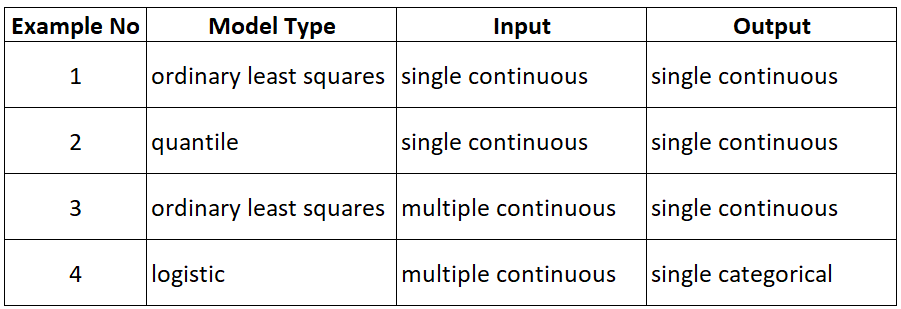

Given the flipper length, bill length, and bill depth; our fourth model will predict the island this particular penguins lives in. This time, again, we are working with multiple idependent variables. So, the independent variables, x, are 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm' and the dependent variable, y, is 'island' from our pandas dataframe.

*   x = 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm'
*   y = 'island'

In [ ]:
x = df[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']]
x = sm.add_constant(x)
y = df['island'] #output is a categorical variable!

This time let's explore a different regression approach and fit a logistic regression model. Logistic regression is typically preferred for classification problems where we want to understand the category of a data point given the input variables. This can be a binary classification task, where there are only two categories, or multinomial with three or more categories.

You can use logistic regression when working with continuous input and categorical output variables. Please check out Chapter 12 in this [regression analysis book](https://sadbhavnapublications.org/research-enrichment-material/2-Statistical-Books/Regression-Analysis-by-Example.pdf) for more on logistic regression.

In [ ]:
model_multi_logit = sm.MNLogit(y, x) #MN in MNLogis refers to multinomial because we have multiple input variables
result_multi_logit = model_multi_logit.fit()

Optimization terminated successfully.
         Current function value: 0.631353
         Iterations 7


In [ ]:
print(result_multi_logit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                 island   No. Observations:                  333
Model:                        MNLogit   Df Residuals:                      325
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.3648
Time:                        01:25:57   Log-Likelihood:                -210.24
converged:                       True   LL-Null:                       -330.97
Covariance Type:            nonrobust   LLR p-value:                 2.727e-49
     island=Dream       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.5973      4.478      1.920      0.055      -0.179      17.373
flipper_length_mm    -0.1357      0.022     -6.141      0.000      -0.179      -0.092
bill_length_mm        0.

In [ ]:
predictions_multi_logit = result_multi_logit.predict([1, 180, 47, 19])
print(predictions_multi_logit)

[[0.0187198  0.95249634 0.02878386]]


## **Exercise 4**

**a)** Build a logistic regression model where 'flipper_length_mm' and 'bill_length_mm' are the input variables and 'species' is the output variable.

**b)** Report the R2 of the obtained model.

**c)** Use the model for predicting the species of a penguin with 200 mm flipper length and 50 mm bill length.

In [ ]:
x = df[['flipper_length_mm', 'bill_length_mm']]
x = sm.add_constant(x)
y = df["species"]

In [ ]:
model = sm.MNLogit(y, x)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.116953
         Iterations 10


In [ ]:
print(result.summary())

                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                  333
Model:                        MNLogit   Df Residuals:                      329
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.4451
Time:                        01:37:10   Log-Likelihood:                -194.68
converged:                       True   LL-Null:                       -350.86
Covariance Type:            nonrobust   LLR p-value:                 1.487e-68
species=Chinstrap       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
flipper_length_mm    -0.3230      0.035     -9.334      0.000      -0.391      -0.255
bill_length_mm        1.4169      0.151      9.408      0.000       1.122       1.712
------------------------

In [ ]:
prediction = result.predict([1, 200, 50])
print(prediction)

[[0.00109838 0.99655597 0.00234566]]


# **4.BONUS: What are some other options for regression analysis in Python?**



# **numpy polyfit**

Least squares polynomial fit.

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that *minimizes* the squared error.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = df['bill_length_mm']
y = df['body_mass_g']
z = np.polyfit(x, y, 5)
p = np.poly1d(z)

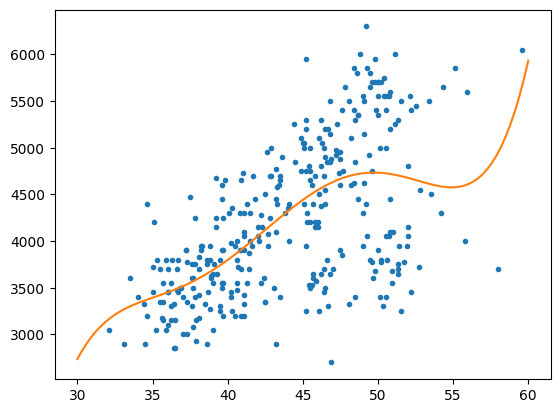

In [ ]:
xp = np.linspace(30, 60, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-')

# **scikit learn**

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df['bill_length_mm']
y = df['body_mass_g']

x_train = np.array(x).reshape(-1, 1)
y_train = np.array(y).reshape(-1, 1)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

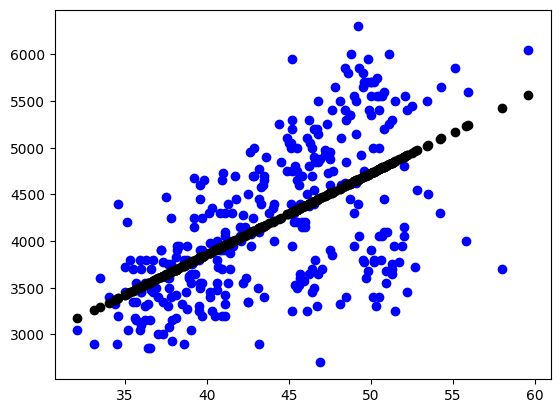

In [ ]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color ='b')
plt.scatter(x_train, y_pred, color ='k')

plt.show()

# **5.Next steps**

Fitting models using R-style formulas

## **Example 5: multi variable, qualitative variables, formula**

In [ ]:
import numpy as np

def log_plus_1(x):
    return np.log(x)+1

In [ ]:
model_formula_fcn = sm.formula.ols(formula="log_plus_1(body_mass_g) ~ flipper_length_mm + bill_length_mm + bill_depth_mm ", data=df)
result_formula_fcn = model_formula_fcn.fit()

In [ ]:
print(result_formula_fcn.summary())

                               OLS Regression Results                              
Dep. Variable:     log_plus_1(body_mass_g)   R-squared:                       0.749
Model:                                 OLS   Adj. R-squared:                  0.746
Method:                      Least Squares   F-statistic:                     326.6
Date:                     Wed, 24 Apr 2024   Prob (F-statistic):           2.78e-98
Time:                             01:36:05   Log-Likelihood:                 313.64
No. Observations:                      333   AIC:                            -619.3
Df Residuals:                          329   BIC:                            -604.1
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------